Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classification).

This lecture section will be broken up by the following sections:
Part 1: Introduction to Support Vector Machines
Part 2: SVM General Explanation
Part 3: Computing the Hyperplane
Part 4: Additional Math Resources
Part 5: SVM with Sci Kit Learn
Part 6: Additional Resources

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Note, we won't use seaborn due to a plot at the end.

In [3]:
from sklearn import datasets

# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# Support Vector Machine Imports
from sklearn.svm import SVC

In [5]:
model = SVC()

In [6]:
from sklearn.cross_validation import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y) 

In [18]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
Y_pred = model.predict(X_test)

In [20]:
from sklearn import metrics

In [21]:
print metrics.accuracy_score(Y_test, Y_pred)

0.947368421053


Now that we've gone through a basic implementation of SVM lets go ahead and quickly explore the various kernel types we can use for classification. 

We can do this by plotting out the boundaries created by each kernel type! We'll start with some imports and by setting up the data.

The four methods we will explore are two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. 

This can be a consequence of the following differences:
LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [23]:
from sklearn import svm


In [25]:
X = iris.data[:,:2]
Y = iris.target

In [26]:
C = 1.0

In [27]:
svc = svm.SVC(kernel = 'linear',C=C).fit(X,Y)

In [28]:
rbf_svc = svm.SVC(kernel= 'rbf',gamma=0.7,C=C).fit(X,Y)


In [29]:
poly_svc = svm.SVC(kernel = 'poly', degree=3, C=C).fit(X,Y)

In [30]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [31]:
h = 0.02
x_min = X[:,0].min() -1
x_max = X[:,0].max() +1


In [32]:
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [33]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [34]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


//anaconda/lib/python2.7/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


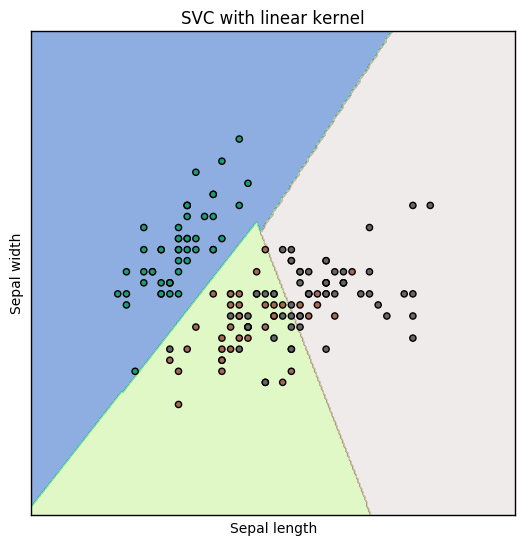

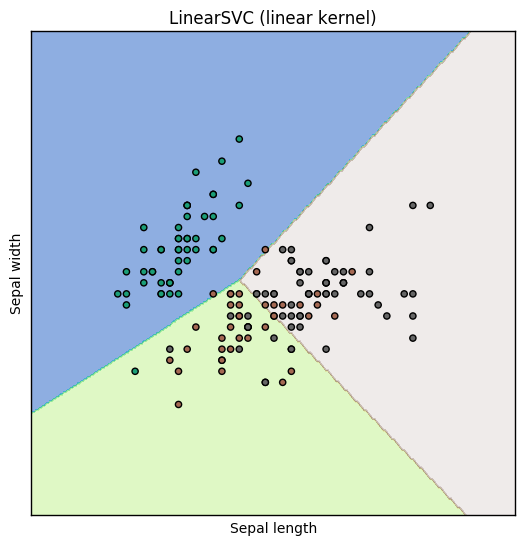

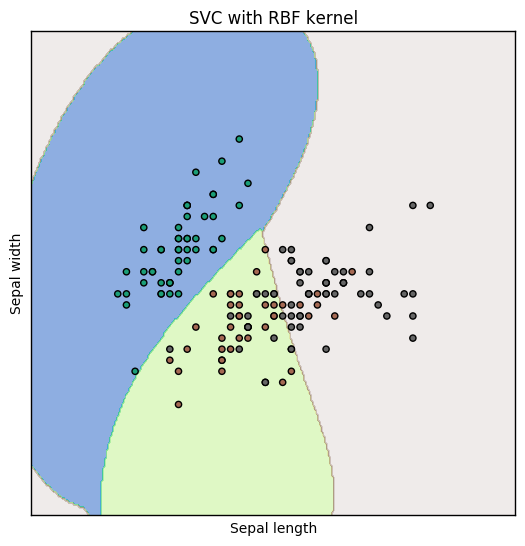

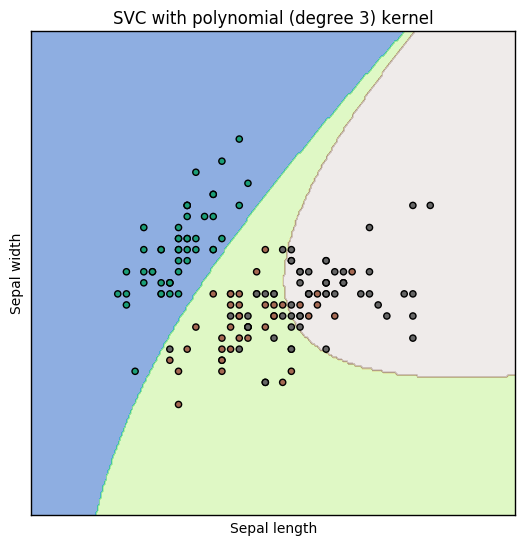

In [37]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
     # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()
    